In [12]:
#importing basic library
import pandas as pd
import numpy as np

In [13]:
#Access google drive contents
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
#load dataset
fileName = "/content/gdrive/My Drive/At a glance: Critical Care Unit/digit.csv"
dataset = pd.read_csv(fileName)

In [15]:
#summarize dataset
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [16]:
#Segregrate Dataset info X(input/independent variable)
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [17]:
#Segregrate Dataset info Y(output/dependent variable)
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


In [18]:
#Training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [19]:
#Model accuracy
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the Model: 96.39999999999999%


Predicted 7


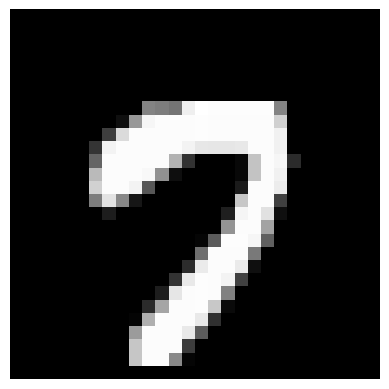

In [21]:
import matplotlib.pyplot as plt
index = 10
print("Predicted " + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap = 'gray')